# Projet Fraude bancaire

In [1]:
import os
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import sys 
import fastparquet

In [2]:
os.getcwd()

'/home/elisa/Documents/M2_SISE/BigDataMining/Projet_Fraude'

## I. Importation et decription du dataframe avec pandas
La 1956362ieme ligne contient les noms des colonnes en doublons. Nous importons donc le fichier sans cette ligne. 

In [3]:
df = pd.read_table("guillaume.txt", sep=";", header=0, decimal=",", skiprows = [1956361])
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,...,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,27134
1,A013011306908024927155000,78643045,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,...,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,...,73.118280,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,28058
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,...,110.056926,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,28128
4,A013010041908000125652029,78643048,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,...,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,29607


In [4]:
print("Le fichier contient " + str(df.shape[0]) + " lignes et " + str(df.shape[1]) + " colonnes.")

Le fichier contient 4646773 lignes et 23 colonnes.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646773 entries, 0 to 4646772
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ZIBZIN                    object 
 1   IDAvisAutorisationCheque  int64  
 2   FlagImpaye                int64  
 3   Montant                   float64
 4   DateTransaction           object 
 5   CodeDecision              int64  
 6   VerifianceCPT1            int64  
 7   VerifianceCPT2            int64  
 8   VerifianceCPT3            int64  
 9   D2CB                      int64  
 10  ScoringFP1                float64
 11  ScoringFP2                float64
 12  ScoringFP3                float64
 13  TauxImpNb_RB              float64
 14  TauxImpNB_CPM             float64
 15  EcartNumCheq              int64  
 16  NbrMagasin3J              int64  
 17  DiffDateTr1               float64
 18  DiffDateTr2               float64
 19  DiffDateTr3               float64
 20  CA3TRetMtt              

In [6]:
# Taille 
taille = sys.getsizeof(df)

print("Taille (octets) = " + str(taille))
print("Taille (bits) = " + str(taille/8))

Taille (octets) = 1514848142
Taille (bits) = 189356017.75


## II. Nettoyage du dataframe

### Variable "Heure"
Cette variable fait doublon avec "DateTransaction". Nous décidons donc de la supprimer.

In [7]:
df.drop(["Heure"], axis = "columns", inplace = True)
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR
0,A013010004908126703060931,78643044,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,...,0.000000,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00
1,A013011306908024927155000,78643045,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,...,0.000000,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,...,0.000000,73.118280,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,...,0.000000,110.056926,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00
4,A013010041908000125652029,78643048,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,...,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25


### Variable "DateTransaction" --> "Date" et "Heure"

In [8]:
# Convertir DateTransaction en 2 colonnes : Date et Heure
DateTransaction_temp = df['DateTransaction'].str.split(' ', 1)
df['Date'] = DateTransaction_temp.str[0]
df['Heure'] = DateTransaction_temp.str[1]
# Supprimer la colonne
df.drop(["DateTransaction"], axis = "columns", inplace = True)
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,...,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Date,Heure
0,A013010004908126703060931,78643044,0,20.00,1,0,0,0,551,0.000000,...,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,2017-02-01,07:32:14
1,A013011306908024927155000,78643045,0,20.00,1,0,0,0,551,0.000000,...,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,2017-02-01,07:43:37
2,A013010002908283134592527,78643046,0,57.64,1,0,0,0,549,0.000000,...,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,2017-02-01,07:47:38
3,A011010002908105209831316,78643047,0,54.29,0,1,1,1,267,0.000000,...,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,2017-02-01,07:48:48
4,A013010041908000125652029,78643048,0,26.90,1,0,0,0,549,0.003769,...,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,2017-02-01,08:13:27


### Variables : "ZIBZIN", "IDAvisAutorisationCheque"
Ce sont des variables d'identifiants, elles n'apportenent donc pas d'information pertinante. Nous décidons donc de les supprimer. 

In [9]:
# Supprimer les colonnes : "ZIBZIN", "IDAvisAutorisationCheque"
df.drop(["ZIBZIN", "IDAvisAutorisationCheque"], axis = "columns", inplace = True)
df.head()

,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,...,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Date,Heure
0,0,20.00,1,0,0,0,551,0.000000,0.000000,0.000000,...,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,2017-02-01,07:32:14
1,0,20.00,1,0,0,0,551,0.000000,0.000000,0.000000,...,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,2017-02-01,07:43:37
2,0,57.64,1,0,0,0,549,0.000000,0.000000,0.000000,...,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,2017-02-01,07:47:38
3,0,54.29,0,1,1,1,267,0.000000,0.000000,0.000000,...,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,2017-02-01,07:48:48
4,0,26.90,1,0,0,0,549,0.003769,8.586333,0.001192,...,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,2017-02-01,08:13:27


### Variable "CodeDecision" 
En observant le dataframe, nous avons remarquer que la variable qualitative "CodeDecision" possède une valeur à 4 alors que dans la description des données, cette variable ne peut prendre que les valeurs 0, 1, 2 ou 3. Nous faisons donc le choix de la retirer du dataframe.

In [10]:
print("Dans le dataframe initial :")
print(df['CodeDecision'].value_counts())
df = df.drop(df[df["CodeDecision"] == 4].index, axis = 0)
print("-------------------------------------------------------")
print("Après suppression de la ligne où 'CodeDecision' = 4 :")
print(df['CodeDecision'].value_counts())

Dans le dataframe initial :
0    3502786
1    1121626
2      19562
3       2798
4          1
Name: CodeDecision, dtype: int64
-------------------------------------------------------
Après suppression de la ligne où 'CodeDecision' = 4 :
0    3502786
1    1121626
2      19562
3       2798
Name: CodeDecision, dtype: int64


### Variables : "VerifianceCPT1", "VerifianceCPT2", "VerifianceCPT3"
Ces trois variables prennent tout le temps 0 en valeur dans le dataframe de test. Nous décidons donc de les supprimer.

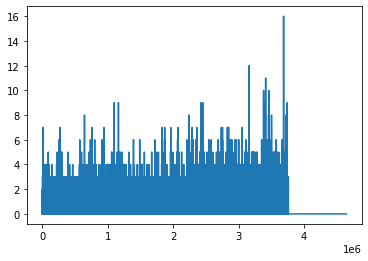

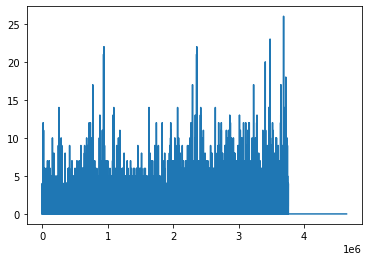

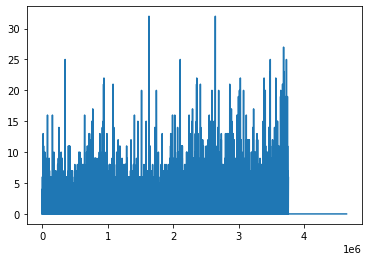

In [11]:
plt.plot(df["VerifianceCPT1"])
plt.show()
plt.plot(df["VerifianceCPT2"])
plt.show()
plt.plot(df["VerifianceCPT3"])
plt.show()

In [12]:
# Supprimer les colonnes : "VerifianceCPT1", "VerifianceCPT2", "VerifianceCPT3"
df.drop(["VerifianceCPT1", "VerifianceCPT2", "VerifianceCPT3"], axis = "columns", inplace = True)
df.head()

,FlagImpaye,Montant,CodeDecision,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Date,Heure
0,0,20.00,1,551,0.000000,0.000000,0.000000,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,2017-02-01,07:32:14
1,0,20.00,1,551,0.000000,0.000000,0.000000,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,2017-02-01,07:43:37
2,0,57.64,1,549,0.000000,0.000000,0.000000,73.118280,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,2017-02-01,07:47:38
3,0,54.29,0,267,0.000000,0.000000,0.000000,110.056926,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,2017-02-01,07:48:48
4,0,26.90,1,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,2017-02-01,08:13:27


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4646772 entries, 0 to 4646772
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   FlagImpaye     int64  
 1   Montant        float64
 2   CodeDecision   int64  
 3   D2CB           int64  
 4   ScoringFP1     float64
 5   ScoringFP2     float64
 6   ScoringFP3     float64
 7   TauxImpNb_RB   float64
 8   TauxImpNB_CPM  float64
 9   EcartNumCheq   int64  
 10  NbrMagasin3J   int64  
 11  DiffDateTr1    float64
 12  DiffDateTr2    float64
 13  DiffDateTr3    float64
 14  CA3TRetMtt     float64
 15  CA3TR          float64
 16  Date           object 
 17  Heure          object 
dtypes: float64(11), int64(5), object(2)
memory usage: 673.6+ MB


## III. Transformation du dataset en dask 

In [14]:
df_dask = dd.from_pandas(df, npartitions=20)
print(df_dask)

Dask DataFrame Structure:
               FlagImpaye  Montant CodeDecision   D2CB ScoringFP1 ScoringFP2 ScoringFP3 TauxImpNb_RB TauxImpNB_CPM EcartNumCheq NbrMagasin3J DiffDateTr1 DiffDateTr2 DiffDateTr3 CA3TRetMtt    CA3TR    Date   Heure
npartitions=20                                                                                                                                                                                                      
0                   int64  float64        int64  int64    float64    float64    float64      float64       float64        int64        int64     float64     float64     float64    float64  float64  object  object
232339                ...      ...          ...    ...        ...        ...        ...          ...           ...          ...          ...         ...         ...         ...        ...      ...     ...     ...
...                   ...      ...          ...    ...        ...        ...        ...          ...           ...        

In [15]:
df_dask.dtypes

FlagImpaye         int64
Montant          float64
CodeDecision       int64
D2CB               int64
ScoringFP1       float64
ScoringFP2       float64
ScoringFP3       float64
TauxImpNb_RB     float64
TauxImpNB_CPM    float64
EcartNumCheq       int64
NbrMagasin3J       int64
DiffDateTr1      float64
DiffDateTr2      float64
DiffDateTr3      float64
CA3TRetMtt       float64
CA3TR            float64
Date              object
Heure             object
dtype: object

## IV. Convertir et enregistrer le dataset dask au format parquet 

In [16]:
df_dask.to_parquet('guillaumeb_parquet')

## V. Verification du dataset au format parquet 

In [17]:
df_parquet = dd.read_parquet('guillaumeb_parquet')
print(df_parquet)

Dask DataFrame Structure:
               FlagImpaye  Montant CodeDecision   D2CB ScoringFP1 ScoringFP2 ScoringFP3 TauxImpNb_RB TauxImpNB_CPM EcartNumCheq NbrMagasin3J DiffDateTr1 DiffDateTr2 DiffDateTr3 CA3TRetMtt    CA3TR    Date   Heure
npartitions=20                                                                                                                                                                                                      
0                   int64  float64        int64  int64    float64    float64    float64      float64       float64        int64        int64     float64     float64     float64    float64  float64  object  object
232339                ...      ...          ...    ...        ...        ...        ...          ...           ...          ...          ...         ...         ...         ...        ...      ...     ...     ...
...                   ...      ...          ...    ...        ...        ...        ...          ...           ...        

In [18]:
df_parquet.head()

,FlagImpaye,Montant,CodeDecision,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Date,Heure
0,0,20.00,1,551,0.000000,0.000000,0.000000,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,2017-02-01,07:32:14
1,0,20.00,1,551,0.000000,0.000000,0.000000,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,2017-02-01,07:43:37
2,0,57.64,1,549,0.000000,0.000000,0.000000,73.118280,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,2017-02-01,07:47:38
3,0,54.29,0,267,0.000000,0.000000,0.000000,110.056926,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,2017-02-01,07:48:48
4,0,26.90,1,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,2017-02-01,08:13:27


In [19]:
df_parquet.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 18 entries, FlagImpaye to Heure
dtypes: object(2), float64(11), int64(5)